<a href="https://colab.research.google.com/github/skncode/lp3/blob/main/KNN_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
 df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
x=df.drop(['Outcome'],axis=1)
print(x)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  
0       0.627   50  
1       0.351   31  
2       0.672   32  
3       0.167   21  
4     

In [10]:
y=df['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
# # Additional
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# scorelist=[]
# k_range=range(1,26)
# for k in k_range:
#   knn=KNeighborsClassifier(n_neighbors=k)
#   knn.fit(x_train,y_train)
#   y_predict=knn.predict(x_test)
#   scorelist.append(metrics.accuracy_score(y_test,y_predict))



In [13]:
# # Additional Continues
# plt.plot(k_range,scorelist)
# plt.xlabel("Value of K")
# plt.ylabel("Testing Accuracy")

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

y_predict=knn.predict(x_test)
print("Prediction ",y_predict)

Prediction  [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0]


In [15]:
from sklearn import metrics

print("Confusion Matrix",metrics.confusion_matrix(y_test,y_predict))
print("KNN Accuracy ",metrics.accuracy_score(y_test,y_predict))

Confusion Matrix [[133  18]
 [ 42  38]]
KNN Accuracy  0.7402597402597403


In [16]:
# Error Rate
# 1 method->
cs=metrics.confusion_matrix(y_test,y_predict)
total_examples=cs[0,0]+cs[0,1]+cs[1,0]+cs[1,1]
total_misclassified=cs[0,1]+cs[1,0]

print("Error rate: ",total_misclassified/total_examples)

# 2 method->
print("Error rate: ",1-metrics.accuracy_score(y_test,y_predict))

Error rate:  0.2597402597402597
Error rate:  0.2597402597402597


In [17]:
# Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       151
           1       0.68      0.47      0.56        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



Text(33.0, 0.5, 'Actual Label')

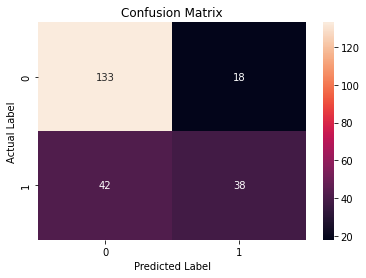

In [18]:
# Heat-Map
cnf_matrix=metrics.confusion_matrix(y_test,y_predict)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')